In [2]:
import pandas as pd
import numpy as np
import piplite
await piplite.install('seaborn')

<ipython-input-2-cec0a3d86e2d>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# download the datasets
from pyodide.http import pyfetch

async def download(url,filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, 'wb') as f:
            f.write(await response.bytes())

In [8]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [10]:
# downlaod the document and save it in usedcars.csv
await download(file_path, 'usedcars.csv')
file_name = 'usedcars.csv'

In [11]:
# read into dataframe
df = pd.read_csv(file_name, header=0)

In [12]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [13]:
# Analyzing Individual Feature Patterns Using Visualization
# When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [15]:
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [16]:
# check the data type of the column with 'peak-rpm'
df['peak-rpm'].dtypes


dtype('float64')

In [17]:
# calclate the correlation between variables of type 'int64' or 'float64'
numeric_df = df.select_dtypes(include=['float64', 'int64'])
numeric_df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [18]:
# find the correlation between the following columns: bore, stroke, compression-rate, and horsepowwr
df[['bore','stroke','compression-ratio','horsepower']].corr

<bound method DataFrame.corr of      bore  stroke  compression-ratio  horsepower
0    3.47    2.68                9.0       111.0
1    3.47    2.68                9.0       111.0
2    2.68    3.47                9.0       154.0
3    3.19    3.40               10.0       102.0
4    3.19    3.40                8.0       115.0
..    ...     ...                ...         ...
196  3.78    3.15                9.5       114.0
197  3.78    3.15                8.7       160.0
198  3.58    2.87                8.8       134.0
199  3.01    3.40               23.0       106.0
200  3.78    3.15                9.5       114.0

[201 rows x 4 columns]>

In [ ]:
# trigt to use visualization to check for potential predictors of price and this done by checking the linearity on a regression plot

(0.0, 53421.54709534096)

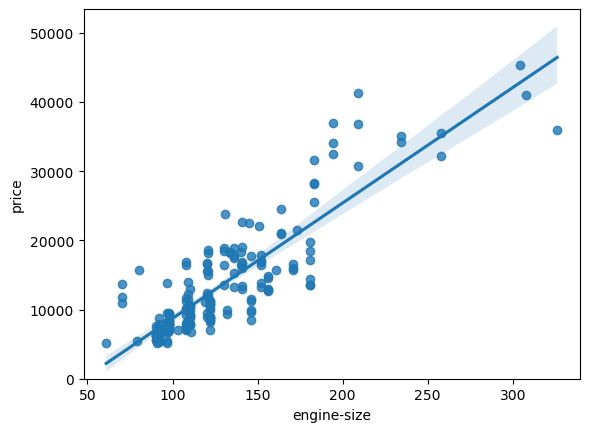

In [19]:
# engine size as potential predictor of price
sns.regplot(x='engine-size', y ='price', data=df)
plt.ylim(0,)

In [ ]:
# As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [20]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [ ]:
# there is a high correlation between engine size and price, this also informs that engine size could be a good predictor of price 

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

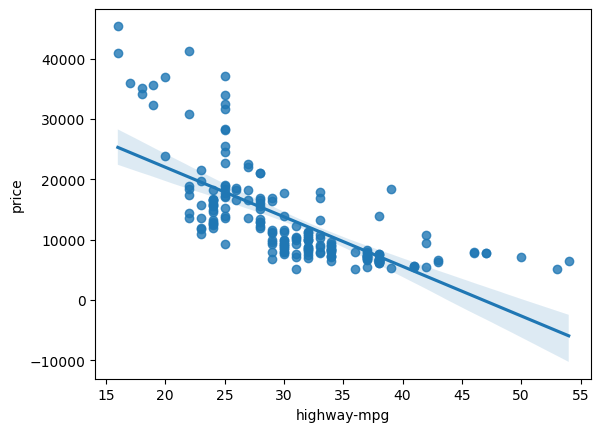

In [21]:
sns.regplot(x='highway-mpg', y='price', data=df)

In [22]:
# As highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.

In [23]:
# correlating hhighway-mpg to price to understand their relationship
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


In [24]:
# examine the correlation between 'highway-mpg' and 'price' and see it's approximately -0.704.
# this indicates that there is a stong inverse relationship between highway-mpg and prive hence the higher the highwaympg the lesser the price

In [25]:
# Weak Linear Relationship

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

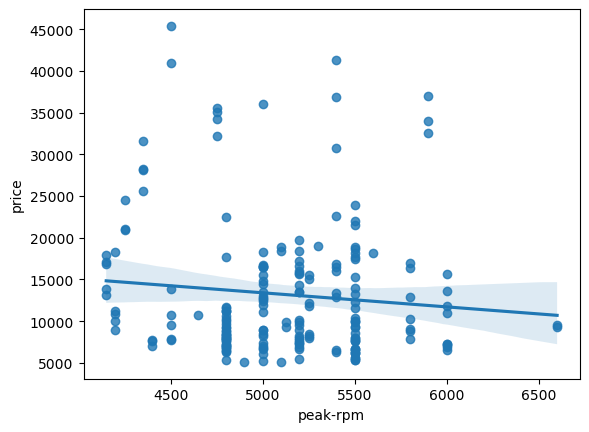

In [27]:
sns.regplot(x='peak-rpm', y='price', data = df)

In [ ]:
# Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.

In [28]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [29]:
# We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616.

<AxesSubplot:xlabel='stroke', ylabel='price'>

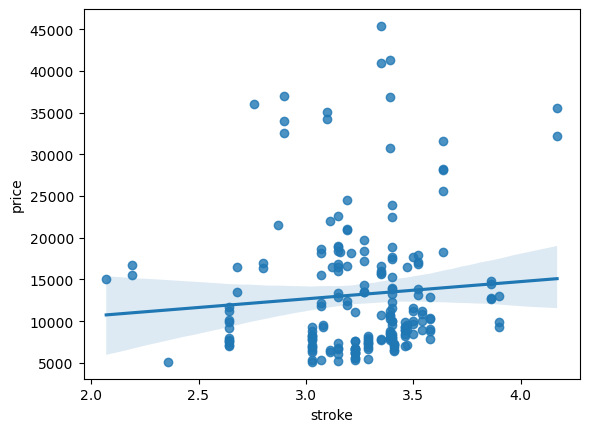

In [30]:
sns.regplot(x='stroke', y='price', data=df)

In [ ]:
# 

In [31]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


In [ ]:
# We can examine the correlation between 'stroke' and 'price' and see it's approximately 0.08231.

In [32]:
# Categorical Variables
# These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

<AxesSubplot:xlabel='body-style', ylabel='price'>

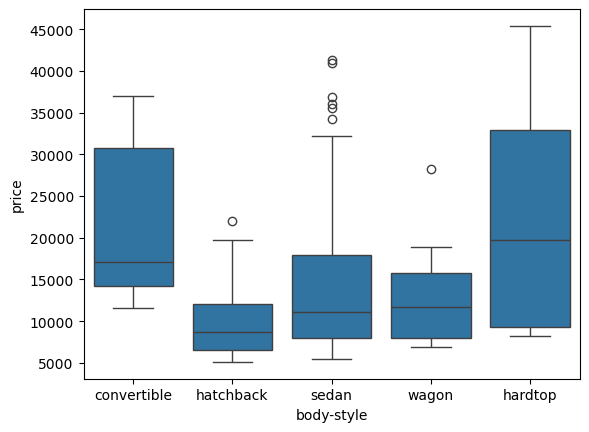

In [33]:
sns.boxplot(x='body-style', y='price', data=df)

<AxesSubplot:xlabel='engine-location', ylabel='price'>

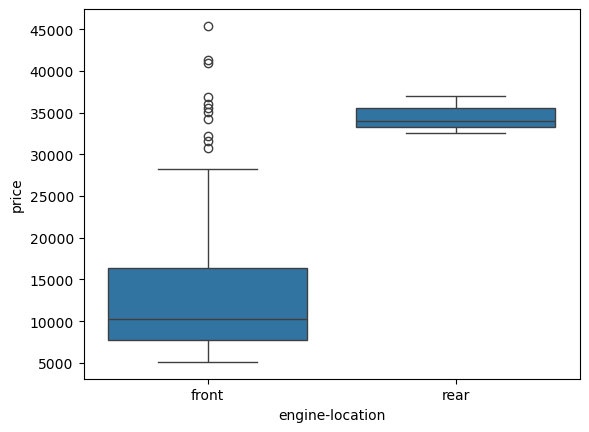

In [34]:
sns.boxplot(x='engine-location', y='price', data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

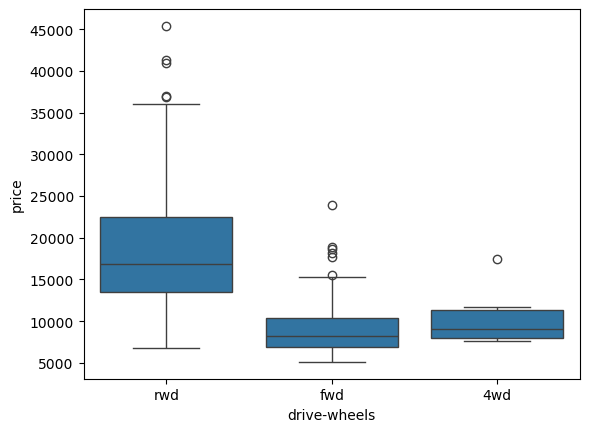

In [35]:
sns.boxplot(x='drive-wheels', y='price', data=df)

In [36]:
# Descriptive Statistical Analysis

In [38]:
# The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [39]:
# The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:
df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [ ]:
# Value Counts
# Value counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column "drive-wheels". Don’t forget the method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket df['drive-wheels'], not two brackets df[['drive-wheels']]

In [40]:
df['drive-wheels'].value_counts()
# the series can be converted to a df
df['drive-wheels'].value_counts().to_frame()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [44]:
# to give clarity to the data we save the results to dataframe 'drive_wheel_counts' and rename the column 'drive-wheels' to 'value_counts'.
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.reset_index(inplace=True)
drive_wheels_counts = drive_wheels_counts.rename(columns={'drive-wheels': 'Value_counts'})
drive_wheels_counts

,Value_counts,count
0,fwd,118
1,rwd,75
2,4wd,8


In [45]:
# rename the index to 'drive-wheels'
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts


,Value_counts,count
drive-wheels,,
0,fwd,118
1,rwd,75
2,4wd,8


In [46]:
df['drive-wheels']


0      rwd
1      rwd
2      rwd
3      fwd
4      4wd
      ... 
196    rwd
197    rwd
198    rwd
199    rwd
200    rwd
Name: drive-wheels, Length: 201, dtype: object

In [47]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


In [48]:
# Basics of Grouping
# The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

In [50]:
# to check the unique characters/ categories of any column
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [52]:
# if we want to know, on average, which type of drive wheel is most valuable, ten group 'drive-wheels' and then average it
# We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [60]:
df_grouped= df_group_one.groupby(['drive-wheels'], as_index= False).agg({'price':'mean'})
df_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [63]:
# # From the data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

# You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. 
df_gptest =df[['drive-wheels', 'body-style', 'price']]
grouped_test1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test1


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [64]:
# pivot table
# This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.

# In this case, I will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table.

grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [65]:
# Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. It should be mentioned that missing data is quite a complex subject and is an entire course on its own.
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [73]:
# calculating the average price for each car based on body style
check= df.groupby(['body-style'], as_index= False)['price'].mean()
check

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [74]:
# Visualization
import matplotlib.pyplot as plt
%matplotlib inline 

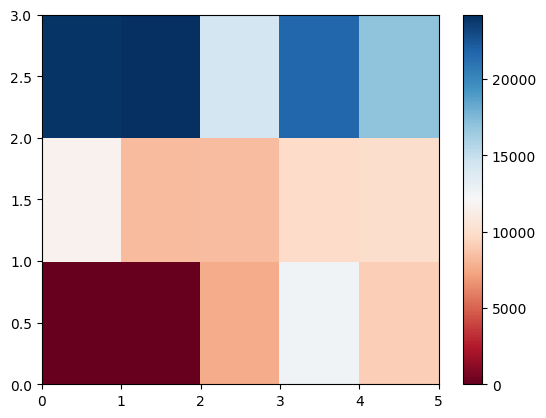

In [75]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

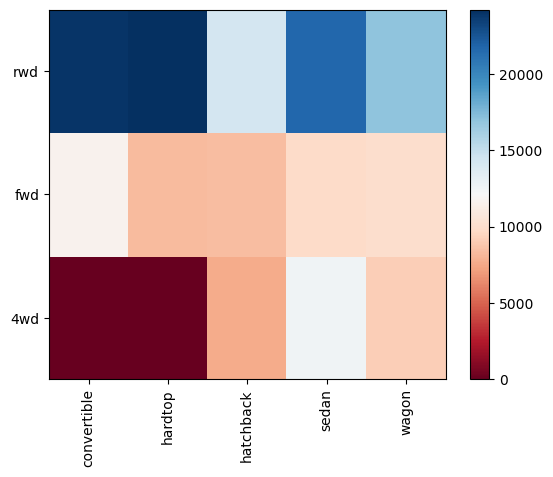

In [76]:
# The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' on the vertical and horizontal axis, respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

# The default labels convey no useful information .So i will like to change it:

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [ ]:
# Correlation and Causation
# Correlation: a measure of the extent of interdependence between variables.

# Causation: the relationship between cause and effect between two variables.

# It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

# Pearson Correlation

# The Pearson Correlation measures the linear dependence between two variables X and Y.

# The resulting coefficient is a value between -1 and 1 inclusive, where:

# 1: Perfect positive linear correlation.
# 0: No linear correlation, the two variables most likely do not affect each other.
# -1: Perfect negative linear correlation.
# Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

In [77]:
df.corr()

<class 'ValueError'>: could not convert string to float: 'alfa-romero'

In [ ]:
# # P-value

# What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

# By convention, when the

# p-value is 
#  0.001: we say there is strong evidence that the correlation is significant.
# the p-value is 
#  0.05: there is moderate evidence that the correlation is significant.
# the p-value is 
#  0.1: there is weak evidence that the correlation is significant.
# the p-value is 
#  0.1: there is no evidence that the correlation is significant.

In [78]:
# I can obtain this information using "stats" module in the "scipy" library.
from scipy import stats

In [86]:
# Wheel-Base vs Price
# lets calculate the pearson correlation Coefficient and P-value of 'wheel-base'and'price'
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print('The Pearson Correlation Coefficient of Wheel-Base and Price is', pearson_coef, 'with a P-value of P =', p_value)

The Pearson Correlation Coefficient of Wheel-Base and Price is 0.5846418222655085 with a P-value of P = 8.076488270732338e-20


In [87]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print('The Pearson Correlation Coefficient of horse power and price is', pearson_coef, 'with a P-value of P =', p_value)


The Pearson Correlation Coefficient of horse power and price is 0.8095745670036559 with a P-value of P = 6.36905742825956e-48


In [88]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient of length and price  is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient of length and price  is 0.6906283804483643  with a P-value of P =  8.016477466158871e-30


In [89]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient  of width and price is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient  of width and price is 0.7512653440522663  with a P-value of P = 9.200335510485071e-38


In [90]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient of curb weight and price is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient of curb weight and price is 0.8344145257702845  with a P-value of P =  2.1895772388939654e-53


In [91]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient of engine-size and price is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient of engine-size and price is 0.8723351674455188  with a P-value of P = 9.26549162219582e-64


In [92]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient of bore and price is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient of bore and price is 0.5431553832626601  with a P-value of P =   8.049189483935384e-17


In [93]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient of city-mpg and price is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient of city-mpg and price is -0.6865710067844684  with a P-value of P =  2.3211320655672357e-29


In [94]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient of highway-mpg and price is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient of highway-mpg and price is -0.7046922650589532  with a P-value of P =  1.7495471144475574e-31
